<a href="https://colab.research.google.com/github/udaykondreddy/Code-for-learn-machinelearning/blob/master/Data%20preprocessing/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature scaling

In [ ]:
#Import libraries 


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from  sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
#download wine quality dataset using kaggle API or normal download
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [ ]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.9;0.

In [ ]:
#Load data
data = pd.read_csv("winequality-red.csv",sep=';')

In [ ]:
#visualize data
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Data discription
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Lets build the model without scaling it 
#split the data
x = data.drop('quality',axis=1)
y = data['quality']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=34)

In [ ]:
#train the SVR model
model = SVR(kernel='rbf',C=5)
model.fit(X_train,y_train)

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#results
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(rmse, r2)

0.7000926406791761 0.29066940839662503


In [ ]:
#train the model with by normalizing the data with min max
norm = MinMaxScaler()
norm.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_mmc = norm.transform(X_train)
X_test_mmc = norm.transform(X_test)

In [ ]:
data_mmc = pd.DataFrame(X_train_mmc,columns=x.columns)

In [ ]:
data_mmc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.221239,0.407534,0.00,0.099315,0.098497,0.298507,0.150735,0.458884,0.433071,0.071856,0.153846
1,0.327434,0.109589,0.48,0.082192,0.135225,0.074627,0.022059,0.294420,0.409449,0.173653,0.615385
2,0.318584,0.356164,0.27,0.075342,0.138564,0.059701,0.261029,0.543319,0.307087,0.173653,0.107692
3,0.256637,0.191781,0.12,0.143836,0.133556,0.417910,0.172794,0.486784,0.496063,0.221557,0.292308
4,0.300885,0.089041,0.43,0.054795,0.091820,0.313433,0.161765,0.332599,0.503937,0.161677,0.538462


In [ ]:
data_mmc.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,0.327072,0.277300,0.270250,0.110569,0.125922,0.218746,0.147603,0.489262,0.450658,0.196896,0.310772
std,0.154652,0.122201,0.193732,0.089775,0.079256,0.154782,0.118572,0.139349,0.122815,0.103219,0.163395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.089552,0.058824,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.113523,0.179104,0.117647,0.488253,0.448819,0.173653,0.276923
75%,0.407080,0.352740,0.420000,0.116438,0.130217,0.298507,0.205882,0.568282,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#train SVR model on scaled data (min-max)
model = SVR(kernel='rbf',C=5)
model.fit(X_train_mmc,y_train)
y_pred = model.predict(X_test_mmc)
minmax_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
minmax_r2=r2_score(y_test,y_pred)
print(minmax_rmse,minmax_r2)

0.65474058860187 0.379593706917438


In [ ]:
#train the model with by standardizing the data
stand = StandardScaler()
stand.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_sc = stand.transform(X_train)
X_test_sc = stand.transform(X_test)

In [ ]:
data_sc = pd.DataFrame(X_train_sc,columns=x.columns)

In [ ]:
data_sc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.684615,1.066185,-1.395553,-0.125407,-0.346165,0.515532,0.026427,-0.218089,-0.143258,-1.211899,-0.960810
1,0.002340,-1.372997,1.083133,-0.316223,0.117439,-0.931498,-1.059245,-1.398815,-0.335677,-0.225274,1.865056
2,-0.054907,0.645636,-0.001292,-0.392549,0.159585,-1.027966,0.957003,0.388087,-1.169494,-0.225274,-1.243397
3,-0.455630,-0.700119,-0.775882,0.370714,0.096366,1.287281,0.212542,-0.017787,0.369860,0.239021,-0.113050
4,-0.169399,-1.541217,0.824937,-0.621528,-0.430456,0.612001,0.119485,-1.124718,0.434000,-0.341347,1.394078


In [ ]:
data_sc.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03
mean,-8.241022e-18,-4.433484e-16,2.419527e-16,6.296511e-18,6.933107e-17,-9.912375e-17,-3.851983e-17,-1.435644e-14,3.074179e-17,-1.044480e-16,2.662128e-16
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.115770e+00,-2.270168e+00,-1.395553e+00,-1.232139e+00,-1.589465e+00,-1.413841e+00,-1.245360e+00,-3.512526e+00,-3.670943e+00,-1.908341e+00,-1.902765e+00
25%,-6.846151e-01,-7.561925e-01,-9.307995e-01,-4.688756e-01,-3.672377e-01,-8.350291e-01,-7.490531e-01,-5.976081e-01,-6.563757e-01,-6.315313e-01,-8.666146e-01
50%,-2.266454e-01,-2.724154e-02,-5.293136e-02,-2.398965e-01,-1.565088e-01,-2.562172e-01,-2.527458e-01,-7.245014e-03,-1.497842e-02,-2.252737e-01,-2.072459e-01
75%,5.175554e-01,6.175997e-01,7.732975e-01,6.540895e-02,5.422007e-02,5.155320e-01,4.917152e-01,5.673048e-01,5.622791e-01,4.131310e-01,6.405139e-01
max,4.353052e+00,5.916513e+00,3.768377e+00,9.911509e+00,1.103319e+01,5.049559e+00,7.191864e+00,3.666711e+00,4.474802e+00,7.783803e+00,4.219944e+00


In [ ]:
#train SVR model on scaled data
model = SVR(kernel='rbf',C=5)
model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
sc_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
sc_r2=r2_score(y_test,y_pred)
print(sc_rmse,sc_r2)

0.6591438668024384 0.3712209021407855


In [ ]:
print("rmse without scaling ", rmse)
print("rmse without scaling ", minmax_rmse)
print("rmse without scaling ", sc_rmse)

rmse without scaling  0.7000926406791761
rmse without scaling  0.65474058860187
rmse without scaling  0.6591438668024384


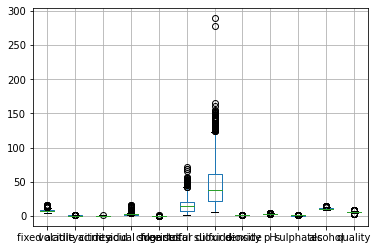

In [ ]:
data.boxplot()

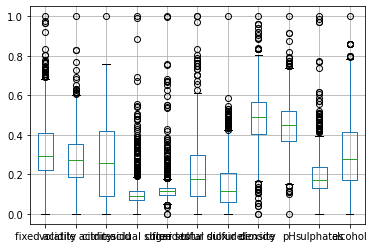

In [ ]:
data_mmc.boxplot()

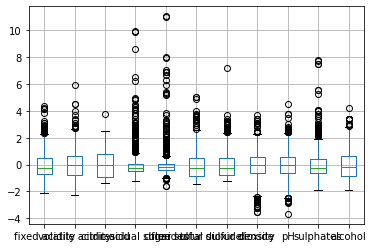

In [ ]:
data_sc.boxplot()